# Part 1 - Gabriel Peyré (gradient descent)

dataset : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
%matplotlib inline

In [2]:
data = pd.read_csv('./data/winequality-red.csv', sep=',')
data = data.drop_duplicates()

### Question 1 : Load an original dataset, comment on this dataset (what are the features, the dimensions of the problem, how does the correlation matrix looks like)

We have the following Dataset about Wine. The features are wine characteristic's and the quality is the label (integer 3 to 8).

This is a 11 dimensions problems, with the following features : fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates and alcohol. (all float)

In [118]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


We are beginning by checking how the data are distributed. We can use some plot to visualize the distribution.

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


No null values (seems perfect for now).

In [120]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


About quality of wine : 
- average at 5.62
- median 6
- max at 8
- min at 3

so we can consider :
- a bad wine 3 to 5 
- an average wine 5 to 6
- a good wine 6 to 7 
- a very good wine 7 to 8

(quality is supposed to be an integer)

### Importance of the feature for prediction 

#### Distribution analysis

Before using correlation, let's look at the data repartition, to check if they are important for quality prediction: 

Text(0.5, 1.0, 'pH')

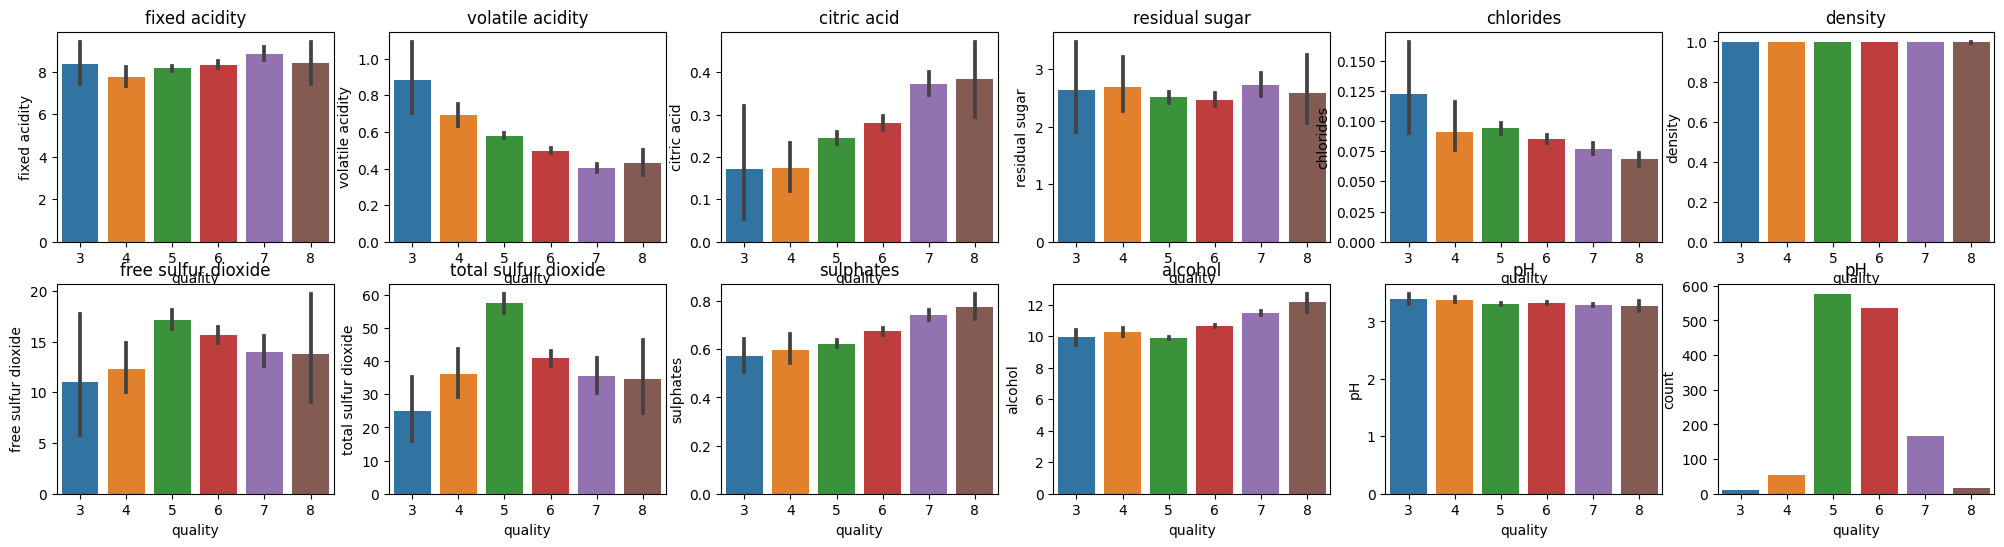

In [121]:
fig, axes = plt.subplots(2, 6, figsize=(25,6))
sn.barplot(x = 'quality', y = 'fixed acidity', data = data, ax=axes[0,0])
axes[0,0].set_title("fixed acidity")
sn.barplot(x = 'quality', y = 'volatile acidity', data = data, ax=axes[0,1])
axes[0,1].set_title("volatile acidity")
sn.barplot(x = 'quality', y = 'citric acid', data = data, ax=axes[0,2])
axes[0,2].set_title("citric acid")
sn.barplot(x = 'quality', y = 'residual sugar', data = data, ax=axes[0,3])
axes[0,3].set_title("residual sugar")
sn.barplot(x = 'quality', y = 'chlorides', data = data, ax=axes[0,4])
axes[0,4].set_title("chlorides")
sn.barplot(x = 'quality', y = 'density', data = data, ax=axes[0,5])
axes[0,5].set_title("density")

sn.barplot(x = 'quality', y = 'free sulfur dioxide', data = data, ax=axes[1,0])
axes[1,0].set_title("free sulfur dioxide")
sn.barplot(x = 'quality', y = 'total sulfur dioxide', data = data, ax=axes[1,1])
axes[1,1].set_title("total sulfur dioxide")
sn.barplot(x = 'quality', y = 'sulphates', data = data, ax=axes[1,2])
axes[1,2].set_title("sulphates")
sn.barplot(x = 'quality', y = 'alcohol', data = data, ax=axes[1,3])
axes[1,3].set_title("alcohol")
sn.barplot(x = 'quality', y = 'pH', data = data, ax=axes[1,4])
axes[1,4].set_title("pH")

#repartition des labels
sn.countplot(x = 'quality', data = data, ax=axes[1,5])
axes[1,5].set_title("pH")

Here we see that : 
- "fixed acidity", "residual sugar", "pH", "density" does not give any specification to classify quality.
- "volatile acidity", "chloride" are quite a downing trend as we go higher in the quality.
- "citric acid", "sulphate", "alcohol" go higher in the quality of the wine. 
- "free sulfur dioxide" and "total sulfur dioxide" are hard to intreped, but seems to be on average values for the best quality.

About label repartition (last graph), we can see the average wine are over-represented, over the bad and very-good one, but that's a common distibution. 
Let's see the label repartition as good or bad wine (using the average to split): 

### Correlation Analysis
#### But before let's normalize the data

In [3]:
# copy the data
data_scaled = data.copy()
mean_data = data_scaled.mean()
std_data =  data_scaled.std()

# apply normalization techniques
for column in data_scaled.columns:
    if column!='quality':
        data_scaled[column] = (data_scaled[column] - mean_data[column]) / std_data[column]
    else : data_scaled[column] = (data_scaled[column] - mean_data[column]) 

# view normalized data   
data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524238,0.931657,-1.392745,-0.460987,-0.245532,-0.468381,-0.383908,0.583788,1.291397,-0.578348,-0.954023,-0.623252
1,-0.293955,1.915095,-1.392745,0.056644,0.200020,0.871682,0.603851,0.048719,-0.708135,0.124776,-0.584360,-0.623252
2,-0.293955,1.259470,-1.188180,-0.165198,0.078506,-0.085506,0.214734,0.155733,-0.321129,-0.051005,-0.584360,-0.623252
3,1.663455,-1.363032,1.471170,-0.460987,-0.265785,0.105932,0.394326,0.690802,-0.966139,-0.461161,-0.584360,0.376748
5,-0.524238,0.713115,-1.392745,-0.534935,-0.265785,-0.276944,-0.204316,0.583788,1.291397,-0.578348,-0.954023,-0.623252


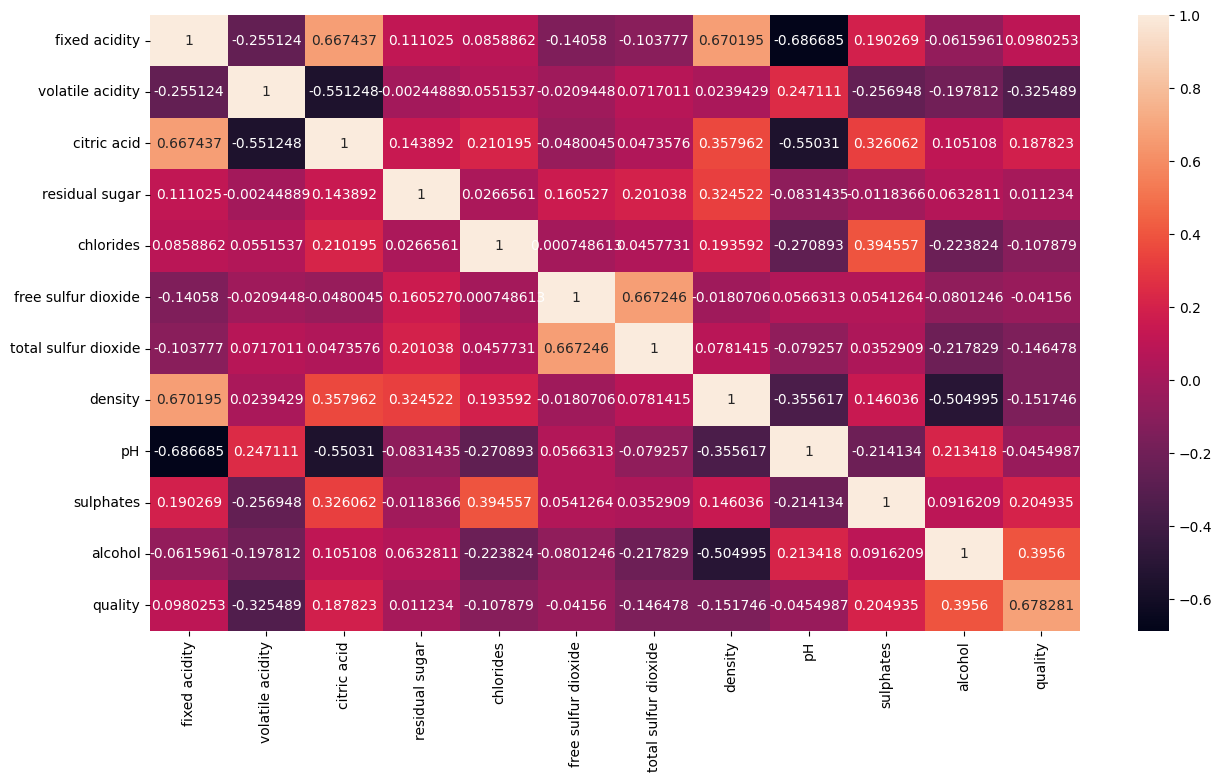

In [123]:
#Non readable result
# C = A.transpose().dot(A)
# plt.imshow(C)

cov_matrix = pd.DataFrame.cov(data_scaled)
plt.figure(figsize=(15,8))
sn.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

General interpretation of the correlation matrix :
- "fixed acid" is positive correlated (>0.6) with "citric acid" and "density", but negative correlated with "pH"(-0.6>). Poor correlated with the rest. 
- "volatile acidity" is negative correlated with citric acid (-0.5>). Poor correlated with the rest. 
- "citric acid" is negative correlated with pH (-0.5>). Poor correlated with the rest. 
- "residual sugar" and "chlorides" are poor correlated. 
- "free sulfur dioxide" is positive correlated with "total sulfur dioxide" (>0.6).
- "density" is negative correlated with "alcohol" (around 0.5)
- "alcohol" is positive correlated with "quality" (around 0.5)

Finaly the more interesting, what is correlated with quality : 
- alcohol have the highest correlation (+ 0.47), that's an non-negligeable influence over the quality.
- Then we have "volatile acidity) with a negative correlation (-0.39), that's a moderate influence, but still interesting to look. 
- Finally "sulphates" and "citric acid" have low influence (+0.22-0.25), but still interesting in sensible product as wine (I guess). 




## Question 2 : Implement gradient descent for regression (l2 loss) or classification (logistic loss) with a small ridge penalty. Display the convergence rate on the training loss for several fixed step sizes. 

We will do a regression here. 

### Gradient Descent


we are beginning by splitting the dataset in train (67%) and test (33%) + shuffle.

In [4]:
df_label = data_scaled['quality']
df_features = data_scaled.drop(columns=['quality'], axis=1) 

X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.33, random_state=42, shuffle = True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(910, 11)
(910,)
(449, 11)
(449,)


We have a train dataset of size 910 and a test of size 449.

In [5]:
from numpy.linalg import norm

def gradient_descent(x0, A, y, Lambda, iterations = 60, learning_rate = 0.1, stopping_threshold = 1e-6):
    
    loss = [] #to return 
    log_opt_distance=[] #to record the distance to the optimal solution
    vector=x0 #starting point
    n,p = X_train.shape #nb of data point , nb feature
    
    #optimal solution 
    sol_vector = np.linalg.solve(A.transpose().dot(A), A.transpose().dot(y))
    prediction_opt = A.dot(sol_vector)
    error_opt = y - prediction_opt 
    mse_opt = (1/(2*n))*(np.dot(error_opt.T,error_opt))
    
    # Gradient descent iteration
    for _ in range(iterations):
        # Calculating the prediction : A*x
        prediction = A.dot(vector)
                
        #mean square error
        error = y - prediction 
        mse = (1/(2*n))*(np.dot(error.T,error))
        mse_ridge = mse + (Lambda/2 * norm(vector,2)**2) 
        loss.append(mse_ridge)

        #log opti distance
        log_opt_distance.append(np.log(mse_ridge-mse_opt))
        
        #calcultating gradient
        grad = -(A.transpose().dot(error))/n
        
        #gradient descent step
        vector = vector - (learning_rate * grad) + Lambda*norm(vector)
        #previous_loss = mse
        # Printing the mse for each iteration
        #print(f"Iteration {i+1}: Cost {mse}")

    return vector, loss, log_opt_distance

In [6]:
A_train = X_train.to_numpy() #training matrix
Y_train = y_train.to_numpy() #label matrix
n,p = X_train.shape #nb of data point, number of feature

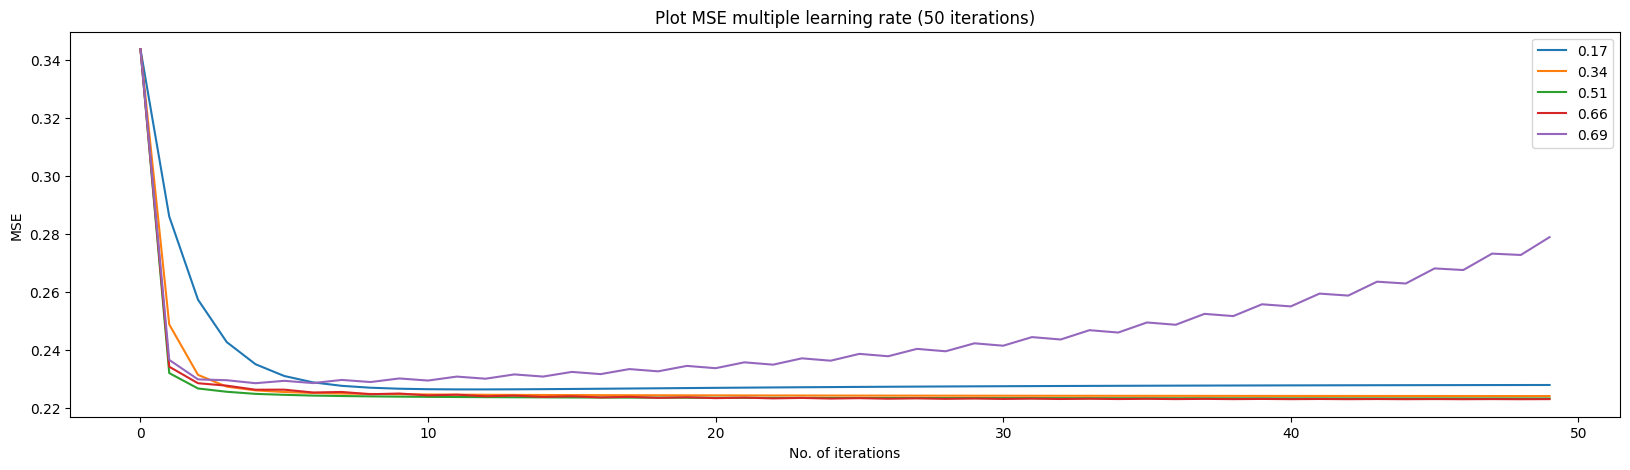

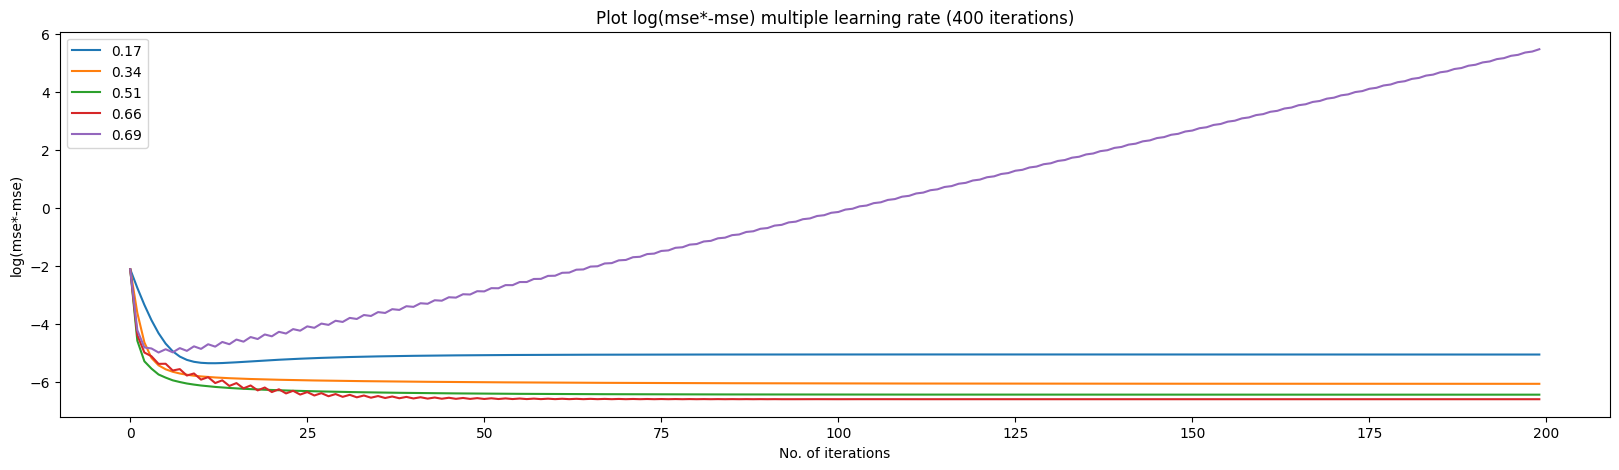

In [8]:
from numpy.linalg import norm
 
x0 = np.zeros((p,1)) #starting point initialization 

#different value of step size 
#0.6675449160241176 is the optimal stepsize, see calculation below
tau_mult = [0.17, 0.34, 0.51 ,0.66, .69 ] 


plt.figure(figsize=(20, 5))
for tau in tau_mult:
    x0 = np.zeros((p))
    final_x , loss, log_opt_dist = gradient_descent(x0, A_train , Y_train, Lambda=0.01 ,iterations=50, learning_rate=tau)
    plt.plot(loss, label=str(tau))
plt.title('Plot MSE multiple learning rate (50 iterations)')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
for tau in tau_mult:
    x0 = np.zeros((p))
    final_x , loss, log_opt_dist = gradient_descent(x0, A_train , Y_train, Lambda=0.01, iterations=200, learning_rate=tau)
    plt.plot(log_opt_dist, label=str(tau))


    
plt.title('Plot log(mse*-mse) multiple learning rate (400 iterations)')
plt.xlabel('No. of iterations')
plt.ylabel('log(mse*-mse)')
plt.legend()
plt.show()

In [9]:
def test_function(A,x,y):
    prediction = A.dot(x)
    error = y - prediction 
    mse = (1/(2*n))*(np.dot(error.T,error))
    return mse

In [16]:
A_test = X_test.to_numpy() 
Y_test = y_test.to_numpy()
best_error=1000 #initialization to keep the best result
for tau in tau_mult:
    x0 = np.zeros((p))
    final_x , loss, log_opt_dist = gradient_descent(x0, A_train , Y_train, Lambda=0.01 ,iterations=50, learning_rate=tau)
    #error calculation on test set 
    test = test_function(A_test,final_x, Y_test)
    print("For tau = "+str(tau)+" the error on the test set is "+str(test))
    if test<best_error : 
        best_error = test
        model = tau
print('-------------------------------------------------')
print("The best performing model is for tau = "+str(model)+ " with an error on test set of "+str(best_error))


For tau = 0.17 the error on the test set is 0.10274363978706
For tau = 0.34 the error on the test set is 0.10132009330945999
For tau = 0.51 the error on the test set is 0.10129650107981125
For tau = 0.66 the error on the test set is 0.1012455650016346
For tau = 0.69 the error on the test set is 0.12076275986159984
-------------------------------------------------
The best performing model is for tau = 0.66 with an error on test set of 0.1012455650016346


Looking the first graph :
- 0.01, 0.1, 0.5, 0.66 are converging faster, we have to check the difference to the optimal value, to see the best.
- 0.69 is diverging (it will diverge for all convergente rate superior to the maximal step size, see below)

Looking the 2nd graph : 
- 0.5 and 0,66 are the best. Finally from 70 iterations, 0.66 is the best one since it converge close to the optimal value.

Let's try on the test set : 


## Question 3: What is the optimal step choice ? How does this compare with the theory ?



As we can see above about the different stepsize:
- values  0.01, 0.1, 0.5, 0.66 are converging fast
- 0.69 is diverging

Finally the best stepsize is 0.66 as it converge closer to the optimal solution.

In theory (from the course) the maximal stepsize is given by :

In [ ]:
C = A_train.transpose().dot(A_train)
tau = 2/np.linalg.norm(C,2)
print('The maximal stepsize for converging is', tau*n)

The maximal stepsize for converging is 0.6801491488961905


As 0.681>0.680, that's why we have the divergence.

In [ ]:
C = A_train.transpose().dot(A_train)
tau_opt = 2 / ( np.linalg.norm(C,2) + np.linalg.norm(C,-2) )
print('The optimal stepsize for converging is', tau_opt*n)

The optimal stepsize for converging is 0.6675449160241176


In [146]:
(1/np.linalg.norm(C,2))*n

0.34007457444809525

So our best stepsize is 0.66 the closest value to the optimal 0.6675449160241176, that explain why it brings so good result.

## Question 4: Show the regression performance on the test set as the ridge penalty changes. 

In [ ]:
def gradient_descent_ridge(x0, A, y, Lambda, iterations = 50, learning_rate = 0.01, stopping_threshold = 1e-6):

    # Initializing learning rate and iterations
    loss = [] #to return 
  
    previous_loss = None
    vector=x0 #starting point
    n = X_train.shape[0] #nb of data point
    # Estimation of optimal parameters
    for _ in range(iterations):
        # Calculating a new prediction
        prediction = A.dot(vector)
        #mean square error
        error = prediction - y 
        mse = (1/(2*n))*(np.dot(error.T,error))
        mse_ridge = mse + (Lambda/2 * norm(vector,2)**2)
        loss.append(mse_ridge)
        #calcultating gradient
        grad = (1/n) * A.transpose().dot(error) + Lambda*norm(vector)

        #gradient descent step
        vector = vector - (learning_rate * grad)

    return vector, loss

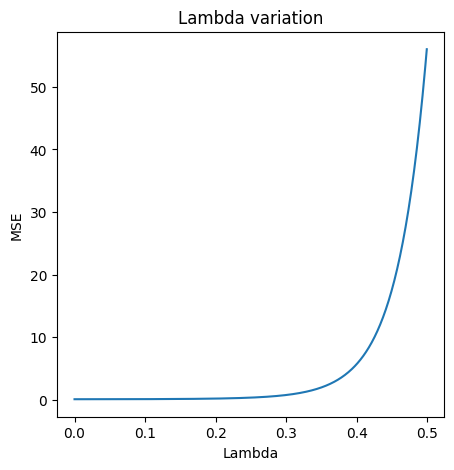

In [154]:
A_test = X_test.to_numpy() #training matrix
Y_test = y_test.to_numpy() #label matrix
Lambda_mult = np.arange(0,0.5,0.001)
n = X_test.shape[0] #nb of data point
plt.figure(figsize=(5, 5))
loss=[]
for Lambda in Lambda_mult:
    x0 = np.zeros((p))
    vector , _ = gradient_descent_ridge(x0, A_train , Y_train, Lambda, learning_rate=0.1)
    error = A_test.dot(vector)
    mse = (1/(2*n))*(np.dot(error.T,error))
    loss.append(mse)
plt.plot(Lambda_mult, loss)
plt.title('Lambda variation')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.show()

From this graph above